<a href="https://colab.research.google.com/github/simple3957/MDS_Hands_on_Session/blob/main/mall_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd

In [13]:
# Distribution graphs (histogram/bar graph) of column data
import math
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int(math.ceil(nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [3]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [4]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [6]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df1 = pd.read_csv('Mall_Customers.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Mall_Customers.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 200 rows and 5 columns


In [7]:
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


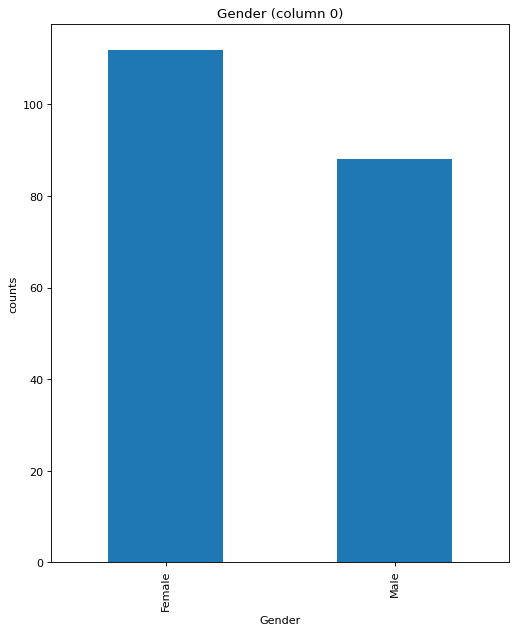

In [14]:
plotPerColumnDistribution(df1, 10, 5)


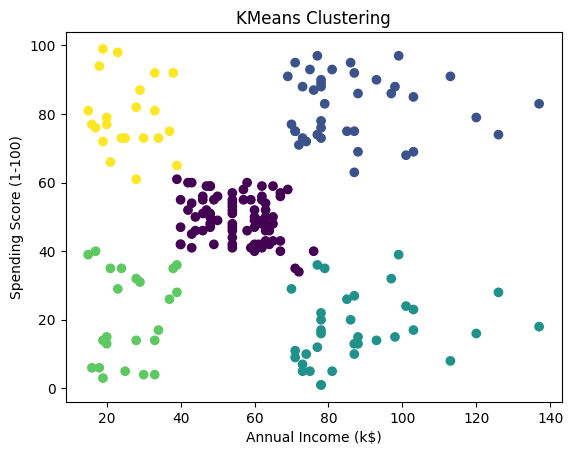

In [15]:


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame and you want to cluster based on 'Annual Income (k$)' and 'Spending Score (1-100)'
X = df1[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the data for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Based on the elbow method or prior knowledge, choose the number of clusters
n_clusters = 5
# Apply KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X_scaled)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
df1['Cluster'] = labels

plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=labels, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('KMeans Clustering')
plt.show()

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans


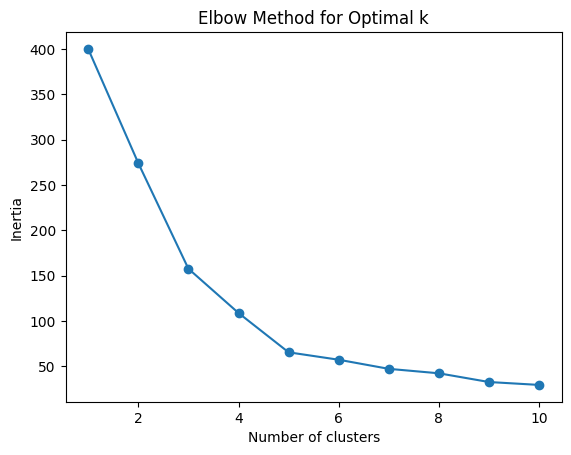

In [21]:
# prompt: elvow curvre for the range of 1-11

# Assuming df1 is your DataFrame and you want to cluster based on 'Annual Income (k$)' and 'Spending Score (1-100)'
X = df1[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the data for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [22]:
# prompt: db scan with distance 0.5 and neighbours 3

from sklearn.neighbors import NearestNeighbors

# Assuming X_scaled is your scaled data
neighbors = NearestNeighbors(n_neighbors=3, radius=0.5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Print or use the distances and indices as needed
print("Distances to nearest neighbors:", distances)
print("Indices of nearest neighbors:", indices)

Distances to nearest neighbors: [[0.         0.08564307 0.27669913]
 [0.         0.15990848 0.20603662]
 [0.         0.07633886 0.16332841]
 [0.         0.0544428  0.15267772]
 [0.         0.08564307 0.24695814]
 [0.         0.0544428  0.12091014]
 [0.         0.07633886 0.12255989]
 [0.         0.19782504 0.24604156]
 [0.         0.12255989 0.16332841]
 [0.         0.17303595 0.19475561]
 [0.         0.0544428  0.0544428 ]
 [0.         0.15753602 0.19782504]
 [0.         0.0544428  0.07764312]
 [0.         0.07764312 0.12091014]
 [0.         0.0544428  0.07764312]
 [0.         0.07764312 0.16332841]
 [0.         0.11450829 0.24511979]
 [0.         0.24511979 0.29489102]
 [0.         0.22357696 0.236036  ]
 [0.         0.15753602 0.24604156]
 [0.         0.11450829 0.19202736]
 [0.         0.03816943 0.19475561]
 [0.         0.19475561 0.24182028]
 [0.         0.03816943 0.19084715]
 [0.         0.19084715 0.2569292 ]
 [0.         0.19475561 0.19782504]
 [0.         0.0544428  0.192027

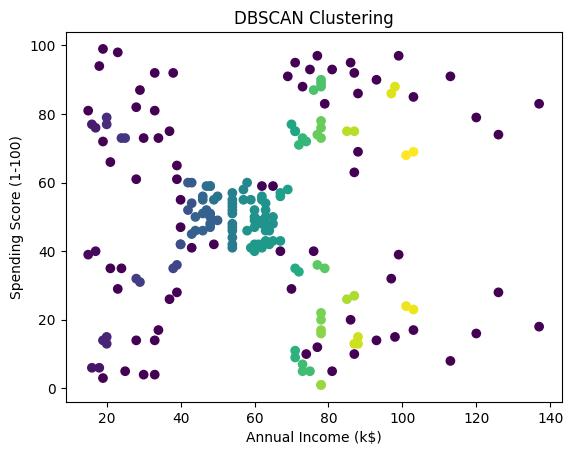

In [34]:


from sklearn.cluster import DBSCAN

# Assuming X_scaled is your scaled data
dbscan = DBSCAN(eps=0.1, min_samples=2)  # Adjust eps and min_samples as needed
dbscan.fit(X_scaled)

# Get the cluster labels for each data point
labels = dbscan.labels_

# Add the cluster labels to the DataFrame
df1['Cluster'] = labels

# Plot the results
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=labels, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clustering')
plt.show()

In [27]:

from sklearn.neighbors import NearestNeighbors

# Assuming X_scaled is your scaled data
neighbors = NearestNeighbors(n_neighbors=5, radius=0.5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Print or use the distances and indices as needed
print("Distances to nearest neighbors:", distances)
print("Indices of nearest neighbors:", indices)

Distances to nearest neighbors: [[0.         0.08564307 0.27669913 0.37699224 0.49391629]
 [0.         0.15990848 0.20603662 0.20857963 0.24604156]
 [0.         0.07633886 0.16332841 0.31170347 0.33100969]
 [0.         0.0544428  0.15267772 0.15990848 0.17128613]
 [0.         0.08564307 0.24695814 0.33025172 0.48457129]
 [0.         0.0544428  0.12091014 0.16332841 0.17303595]
 [0.         0.07633886 0.12255989 0.26999162 0.28226971]
 [0.         0.19782504 0.24604156 0.50013409 0.51750782]
 [0.         0.12255989 0.16332841 0.24182028 0.39008751]
 [0.         0.17303595 0.19475561 0.19782504 0.22536634]
 [0.         0.0544428  0.0544428  0.31290921 0.33100969]
 [0.         0.15753602 0.19782504 0.59950147 0.60225816]
 [0.         0.0544428  0.07764312 0.30781334 0.35763644]
 [0.         0.07764312 0.12091014 0.15267772 0.19782504]
 [0.         0.0544428  0.07764312 0.28226971 0.30781334]
 [0.         0.07764312 0.16332841 0.17128613 0.20603662]
 [0.         0.11450829 0.24511979 0.246

In [35]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Assuming you have your data in X and have scaled it

eps_values = np.arange(0.1, 1.0, 0.1)  # Explore different eps values
min_samples_values = range(2, 15)  # Explore different min_samples values
best_score = -1
best_eps = -1
best_min_samples = -1

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)

        # Calculate silhouette score only if there are at least 2 clusters
        if len(set(labels)) > 1:
            score = silhouette_score(X, labels)

            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best silhouette score: {best_score}")


Best eps: 0.1, Best min_samples: 2, Best silhouette score: -0.5037755483679244
